#Task 1 Genetic String Algorithim

In [ ]:
import random
import string

class Player:
    def __init__(self, targetString):
        self.predictString = ''.join(random.choices(string.ascii_lowercase, k=len(targetString)))
        self.fitness = 0

    def __str__(self):
        return self.predictString

    def calFitness(self, targetString):
        self.fitness = 0
        for i in range(len(targetString)):
            if(self.predictString[i] == targetString[i]):
                self.fitness +=1

        return



class Population:
    def __init__(self, popSize, target, mutationRate):
        self.popSize = popSize
        self.mutationRate = mutationRate
        self.bestPlayer = None
        self.players = []
        self.gen = 0
        self.targetString = target
        for i in range(self.popSize):
            p = Player(self.targetString)
            self.players.append(p)

    def __str__(self):
        strings = [f"player[{i}] = {str(self.players[i])}, playerFitness[{i}] = {str(self.players[i].fitness)}" for i in range(self.popSize)]
        return "\n".join(strings)

    def __eq__(self, other):
        players = other
        return

    def calculateFitness(self):
        for i in range(self.popSize):
            self.players[i].calFitness(self.targetString)
        return

    def chooseBestPlayer(self):
        self.bestPlayer = self.players[0]
        playerNum = 0
        for i in range(self.popSize):
            if self.players[i].fitness >= self.bestPlayer.fitness:
                self.bestPlayer = self.players[i]
                playerNum = i
        return

    def naturalSelection(self):
        self.chooseBestPlayer()
        return

    def crossover(self):
        new_pop = []
        for i in range(self.popSize):
            if random.random() > self.mutationRate:
                parent1 = self.bestPlayer
                parent2 = random.choice(self.players)
                child = self.createChild(parent1, parent2)
                if random.random() < self.mutationRate:
                    child = self.mutation(child)
            else:
                child = self.bestPlayer
            new_pop.append(child)

        self.players = new_pop
        self.gen += 1
        print(f"Gen:{self.gen} Best Player:{self.bestPlayer.predictString} {self.bestPlayer.fitness}")
        return

    def createChild(self, parent1, parent2):
        child = Player(self.targetString)
        crossover_point = random.randint(0, len(self.targetString)-1)
        child.predictString = parent1.predictString[:crossover_point] + parent2.predictString[crossover_point:]
        return child

    def mutation(self, child):
        mutateChar = random.randint(0, len(self.targetString)-1)
        tempString = list(child.predictString)
        tempString[mutateChar] = random.choice(string.ascii_lowercase)
        child.predictString = ''.join(tempString)
        return child

    def checkString(self):
        for i in range(self.popSize):
            if self.players[i].predictString == self.targetString:
                print("\n Best Player")
                print(self.players[i].predictString)
                return True
        return False

target2 = "cats"
target = "artificialintelligencelabs"
popSize = 100
mutationRate = 0.5

pop = Population(popSize, target, mutationRate)
stringFound = False
while not stringFound:
    stringFound = pop.checkString()
    pop.calculateFitness()
    pop.naturalSelection()
    pop.crossover()


#Task 2 TSP Genetic


<ipython-input-136-e1f28539bccb>:117: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G2, prog="twopi")


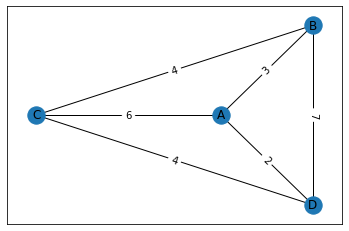

Gen:1 Best Player:['C', 'B', 'A', 'D'] 9 Shortest Distance Of Gen:9
Gen:2 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:3 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:4 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:5 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:6 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:7 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:8 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:9 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:10 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:11 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:12 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:13 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:14 Best Player:['B', 'A', 'D', 'C'] 9 Shortest Distance Of Gen:9
Gen:15 Best Player:['B', 'A', 'D', 'C'] 9 S

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from sys import maxsize
import itertools
import random


class Player:
    def __init__(self, G):
        nodes = list(G.nodes())
        self.path = random.sample(nodes, len(nodes))
        self.graph = G
        self.fitness = 0

    def __str__(self):
        return str(self.path)

    def calFitness(self):
        distance = 0
        #print("Player", self.path)
        for i in range(len(self.path) - 1):
            distance += self.graph[self.path[i]][self.path[i + 1]]['weight']
        self.fitness = distance
        return distance


class Population:
    def __init__(self, popSize, mutationRate, G):
        self.popSize = popSize
        self.mutationRate = mutationRate
        self.bestPlayer = None
        self.players = []
        self.gen = 0
        self.graph = G
        self.shortest_distance = 99999

        for i in range(popSize):
          p = Player(G)
          self.players.append(p)

    def __str__(self):
        strings = []
        for i in range(self.popSize):
            strings.append(f"player[{i}] = {str(self.players[i].path)}, playerFitness[{i}] = {str(self.players[i].fitness)}")
        return "\n".join(strings)

    def chooseBestPlayer(self):
        self.bestPlayer = self.players[0]
        playerNum = 0
        for i in range(self.popSize):
            if self.players[i].fitness <= self.bestPlayer.fitness:
                self.bestPlayer = self.players[i]
                playerNum = i
        return

    def calculateFitness(self):
        for i in range(self.popSize):
            distance = self.players[i].calFitness()
            if distance < self.shortest_distance:
                self.shortest_distance = distance
        return

    def naturalSelection(self):
        self.chooseBestPlayer()
        return

    def crossover(self):
        new_pop = []
        for i in range(self.popSize):
            parent1 = self.bestPlayer
            parent2 = random.choice(self.players)
            child = self.createChild(parent1, parent2)
            if random.random() < self.mutationRate:
                child = self.mutation(child)
            new_pop.append(child)

        self.players = new_pop
        self.gen += 1
        print(f"Gen:{self.gen} Best Player:{self.bestPlayer.path} {self.bestPlayer.fitness} Shortest Distance Of Gen:{self.shortest_distance}")
        return

    def createChild(self, parent1, parent2):
        hasDuplicate = True
        child = Player(self.graph)
        while(hasDuplicate):
          crossover_point = random.randint(0, len(child.path) - 1)
          child.path = parent1.path[:crossover_point] + parent2.path[crossover_point:]
          hasDuplicate = self.checkDuplicate(child.path)
        return child

    def checkDuplicate(self,tempPath):
      return len(tempPath) != len(set(tempPath))

    def mutation(self, child):
        hasDuplicate = True
        mutatePos = random.randint(0, len(child.path) - 1)
        tempPath = list(child.path)
        while(hasDuplicate):
          tempPath[mutatePos] = random.choice(['A','B','C','D'])
          hasDuplicate = self.checkDuplicate(tempPath)

        child.path = tempPath
        #print("MUTATION:",child.path)
        return child

G2 = nx.Graph()
G2.add_edge('A','B',weight=3)
G2.add_edge('B','C',weight=4)
G2.add_edge('C','D',weight=4)
G2.add_edge('D','A',weight=2)
G2.add_edge('A','C',weight=6)
G2.add_edge('B','D',weight=7)

#Draw The Graph with Nodes + Weights
pos = graphviz_layout(G2, prog="twopi")
nx.draw_networkx(G2, pos)
edge_labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)
plt.show()

popSize = 20
mutationRate = 0.01
pop = Population(popSize,mutationRate,G2)
while(pop.gen<=20):
  pop.calculateFitness()
  pop.naturalSelection()
  pop.crossover()

print("")
print("GEN:20 Population")
print("")
pop.calculateFitness()
print(pop)

#Task 3
#### Note Contains Code For BFS,UCS,DFS(Stack),DFS(Recursion),A*

<ipython-input-5-0746ffbfb741>:233: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


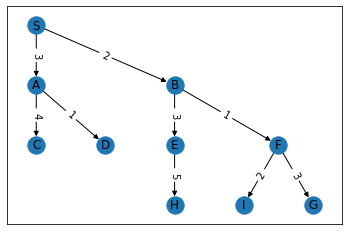

Queue:[(13, 'S')]
Queue:[(4, 'B'), (12, 'A')]
Queue:[(2, 'F'), (12, 'A'), (8, 'E')]
Queue:[(0, 'G'), (8, 'E'), (9, 'I'), (12, 'A')]
['S', 'B', 'F', 'G'] 6


In [ ]:
import queue
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from queue import Queue
from queue import PriorityQueue


class Graph:

  def __init__(self):
    self.graph = {}
    #u : [v1,w1], [v2,w2]

  def add_edge(self,u,v,weight):
    self.graph.setdefault(u, []).append([v,weight])
    self.graph.setdefault(v, [])

  def displayGraph(self):
    G = nx.DiGraph()
    G.add_edge('S','A', weight=3)
    G.add_edge('S','B', weight=2)
    G.add_edge('A','C', weight=4)
    G.add_edge('A','D', weight=1)
    G.add_edge('B','E', weight=3)
    G.add_edge('B','F', weight=1)
    G.add_edge('E','H', weight=5)
    G.add_edge('F','I', weight=2)
    G.add_edge('F','G', weight=3)

    #Draw The Graph with Nodes + Weights
    pos = graphviz_layout(G, prog="dot")
    nx.draw_networkx(G, pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

  def bfs(self,startNode,endNode):
    path = []
    cost = 0
    visited = set()
    queue = Queue()

    queue.put(startNode)
    while not queue.empty():

      curr_node = queue.get()
      path.append(curr_node)

      if(curr_node == endNode):
        return path,cost

      visited.add(curr_node)
      for neighbors,weight in self.graph[curr_node]:
        if neighbors not in visited:
          queue.put(neighbors)
          cost += weight


def bfs(startNode,endNode,G):
  path = []
  cost = 0
  visited = set()
  queue = Queue()

  queue.put(startNode)
  while not queue.empty():

    curr_node = queue.get()
    path.append(curr_node)

    if(curr_node == endNode):
      return path,cost

    visited.add(curr_node)
    for neighbors in G.neighbors(curr_node):
      if neighbors not in visited:
        queue.put(neighbors)
        cost += G.get_edge_data(curr_node,neighbors)["weight"]



def gbfs(startNode,endNode,h,G):
  path = []
  visited = []
  queue = PriorityQueue()
  cost = {startNode:0}

  queue.put((h[startNode],startNode))
  while not queue.empty():

    print(f"Queue:{queue.queue}")

    heu,curr_node = queue.get()
    path.append(curr_node)
    if(curr_node == endNode):
      return path,cost[endNode]

    visited.append(curr_node)
    for neighbors in G.neighbors(curr_node):
      if neighbors not in visited:
        new_cost = cost[curr_node] + G[curr_node][neighbors]["weight"]
        if neighbors not in cost:
          cost[neighbors] = new_cost
          queue.put((h[neighbors],neighbors))

def ucs(startNode,endNode,G):
  path = []
  cost = {startNode:0}
  visited = []
  queue = PriorityQueue()

  queue.put((0,startNode))
  while not queue.empty():
    print(f"Queue:{queue.queue}")

    c, curr_node = queue.get()
    path.append(curr_node)

    if(curr_node == endNode):
      return path,cost[endNode]

    visited.append(curr_node)
    for neighbors in G.neighbors(curr_node):
      if neighbors not in visited:
        new_cost = cost[curr_node] + G[curr_node][neighbors]["weight"]
        if neighbors not in cost or new_cost < cost[neighbors]:
          cost[neighbors] = new_cost
          queue.put((cost[neighbors],neighbors))

def Astar(startNode,endNode,h,G):
  path = []
  cost = {startNode:0}
  visited = []
  queue = PriorityQueue()

  f = h[startNode] + cost[startNode]
  queue.put((f,startNode))
  while not queue.empty():
    print(f"Queue:{queue.queue}")

    astarcost, curr_node = queue.get()
    path.append(curr_node)

    if(curr_node == endNode):
      return path,cost[endNode]

    visited.append(curr_node)
    for neighbors in G.neighbors(curr_node):
      if neighbors not in visited:
        new_cost = cost[curr_node] + G[curr_node][neighbors]["weight"]
        if neighbors not in cost or new_cost < cost[neighbors]:
          cost[neighbors] = new_cost
          f = h[neighbors] + cost[neighbors]
          queue.put((f,neighbors))

def dfs(startNode,endNode, G):
    stack = []
    path = []
    visited = set()
    cost = {startNode:0}

    stack.append(startNode)

    while stack:
        print(stack)
        curr_node = stack.pop()
        path.append(curr_node)

        if curr_node == endNode:
            return path, cost[endNode]

        visited.add(curr_node)
        for neighbors in G.neighbors(curr_node):
            if neighbors not in visited:
              new_cost = cost[curr_node] + G[curr_node][neighbors]["weight"]
              if neighbors not in cost:
                cost[neighbors] = new_cost
                stack.append(neighbors)
    return path, cost


def dfs2(startNode, endNode, G, visited=None, path=None,cost=0):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    visited.add(startNode)
    path.append(startNode)

    if startNode == endNode:
        return path,cost

    for neighbors in G.neighbors(startNode):
        if neighbors not in visited:
            new_cost = cost + G[startNode][neighbors]["weight"]
            result = dfs2(neighbors, endNode, G, visited, path,new_cost)
            if endNode in result[0]:
                return result

    return path


HeuristicDic = {
    'A' : 12,
    'B' : 4,
    'C' : 7,
    'D' : 3,
    'E' : 8,
    'F' : 2,
    'H' : 4,
    'I' : 9,
    'G' : 0,
    'S' : 13
}


G = nx.DiGraph()
G.add_edge('S','A', weight=3)
G.add_edge('S','B', weight=2)
G.add_edge('A','C', weight=4)
G.add_edge('A','D', weight=1)
G.add_edge('B','E', weight=3)
G.add_edge('B','F', weight=1)
G.add_edge('E','H', weight=5)
G.add_edge('F','I', weight=2)
G.add_edge('F','G', weight=3)


#Draw The Graph with Nodes + Weights
pos = graphviz_layout(G, prog="dot")
nx.draw_networkx(G, pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

path,cost = gbfs('S','G',HeuristicDic,G)
print(path,cost)
# G = Graph()
# G.add_edge('S','A', weight=3)
# G.add_edge('S','B', weight=2)
# G.add_edge('A','C', weight=4)
# G.add_edge('A','D', weight=1)
# G.add_edge('B','E', weight=3)
# G.add_edge('B','F', weight=1)
# G.add_edge('E','H', weight=5)
# G.add_edge('F','I', weight=2)
# G.add_edge('F','G', weight=3)
# G.displayGraph()
# path,cost = G.bfs('S','G')
# print(path,cost)

#Task 4 A* Graph

<ipython-input-4-bd43f25489b3>:56: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G2, prog="twopi")


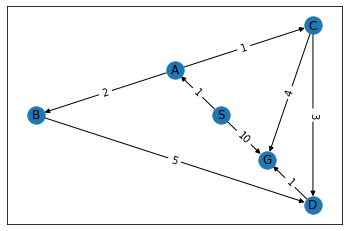

Queue:[(5, 'S')]
Queue:[(4, 'A'), (10, 'G')]
Queue:[(4, 'C'), (10, 'G'), (7, 'B')]
Queue:[(6, 'G'), (7, 'B'), (11, 'D'), (10, 'G')]
['S', 'A', 'C', 'G'] 6


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from queue import PriorityQueue


def Astar(startNode,endNode,h,G):
  path = []
  cost = {startNode:0}
  visited = []
  queue = PriorityQueue()

  f = h[startNode] + cost[startNode]
  queue.put((f,startNode))
  while not queue.empty():
    print(f"Queue:{queue.queue}")

    astarcost, curr_node = queue.get()
    path.append(curr_node)

    if(curr_node == endNode):
      return path,cost[endNode]

    visited.append(curr_node)
    for neighbors in G.neighbors(curr_node):
      if neighbors not in visited:
        new_cost = cost[curr_node] + G[curr_node][neighbors]["weight"]
        if neighbors not in cost or new_cost < cost[neighbors]:
          cost[neighbors] = new_cost
          f = h[neighbors] + cost[neighbors]
          queue.put((f,neighbors))



HeuristicsDic2 = {
    'S' : 5,
    'A' : 3,
    'B' : 4,
    'C' : 2,
    'D' : 6,
    'G' : 0
}

G2 = nx.DiGraph()
G2.add_edge('S','A',weight=1)
G2.add_edge('S','G',weight=10)
G2.add_edge('A','C',weight=1)
G2.add_edge('A','B',weight=2)
G2.add_edge('C','D',weight=3)
G2.add_edge('B','D',weight=5)
G2.add_edge('D','G',weight=1)
G2.add_edge('C','G',weight=4)

#Draw The Graph with Nodes + Weights
pos = graphviz_layout(G2, prog="twopi")
nx.draw_networkx(G2, pos)
edge_labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)
plt.show()

path,cost = Astar('S','G',HeuristicsDic2,G2)
print(path,cost)


#Task 5 Maze

#### Note Contains Code For A*,GBFS


In [ ]:
import sys
import heapq

class Node():
    def __init__(self, state, parent, action,cost):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost


class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node


class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

class PriorityQueueFrontier:
    def __init__(self):
        self.frontier = []
        self.explored = set()

    def add(self, node, priority):
        heapq.heappush(self.frontier, (priority, node))

    def remove(self):
        if not self.frontier:
            raise Exception("Frontier is empty")
        priority, node = heapq.heappop(self.frontier)
        self.explored.add(node.state)
        return node

    def empty(self):
        return len(self.frontier) == 0

    def contains_state(self, state):
        return any(node.state == state for priority, node in self.frontier)

class Maze():

    def __init__(self, filename):

        # Read file and set height and width of maze
        with open(filename) as f:
            contents = f.read()

        # Validate start and goal
        if contents.count("A") != 1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("maze must have exactly one goal")

        # Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        # Keep track of walls
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None


    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()


    def heuristic(self, state):
        x1, y1 = state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)

    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result

    def solve(self):
        """Finds a solution to maze, if one exists."""

        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize frontier to just the starting position
        start = Node(state=self.start, parent=None, action=None, cost=0)
        frontier = PriorityQueueFrontier()
        frontier.add(start, 0)

        # Initialize an empty explored set
        self.explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("no solution")

            # Choose a node from the frontier with the lowest cost
            node = frontier.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if state not in self.explored:
                    child = Node(state=state, parent=node, action=action, cost=node.cost+1)
                    priority = self.heuristic(state) + child.cost
                    frontier.add(child, priority)


    def output_image(self, filename, show_solution=True, show_explored=False):
        from PIL import Image, ImageDraw
        cell_size = 50
        cell_border = 2

        # Create a blank canvas
        img = Image.new(
            "RGBA",
            (self.width * cell_size, self.height * cell_size),
            "black"
        )
        draw = ImageDraw.Draw(img)

        solution = self.solution[1] if self.solution is not None else None
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):

                # Walls
                if col:
                    fill = (40, 40, 40)

                # Start
                elif (i, j) == self.start:
                    fill = (255, 0, 0)

                # Goal
                elif (i, j) == self.goal:
                    fill = (0, 171, 28)

                # Solution
                elif solution is not None and show_solution and (i, j) in solution:
                    fill = (220, 235, 113)

                # Explored
                elif solution is not None and show_explored and (i, j) in self.explored:
                    fill = (212, 97, 85)

                # Empty cell
                else:
                    fill = (237, 240, 252)

                # Draw cell
                draw.rectangle(
                    ([(j * cell_size + cell_border, i * cell_size + cell_border),
                      ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)]),
                    fill=fill
                )

        img.save(filename)


m = Maze("maze1.txt")
print("Maze:")
m.print()
print("Solving...")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")
m.print()
m.output_image("maze.png", show_explored=True)

Maze:

█████B█
█████ █
████  █
████ ██
     ██
A██████

Solving...
States Explored: 11
Solution:

█████B█
█████*█
████**█
████*██
*****██
A██████



In [ ]:
import sys
import heapq

class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action


class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node


class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

class PriorityQueueFrontier:
    def __init__(self):
        self.frontier = []
        self.explored = set()

    def add(self, node, priority):
        heapq.heappush(self.frontier, (priority, node))

    def remove(self):
        if not self.frontier:
            raise Exception("Frontier is empty")
        priority, node = heapq.heappop(self.frontier)
        self.explored.add(node.state)
        return node

    def empty(self):
        return len(self.frontier) == 0

    def contains_state(self, state):
        return any(node.state == state for priority, node in self.frontier)

class Maze():

    def __init__(self, filename):

        # Read file and set height and width of maze
        with open(filename) as f:
            contents = f.read()

        # Validate start and goal
        if contents.count("A") != 1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("maze must have exactly one goal")

        # Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        # Keep track of walls
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None


    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()


    def heuristic(self, state):
        x1, y1 = state
        x2, y2 = self.goal
        return abs(x1 - x2) + abs(y1 - y2)

    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result

    def solve(self):
        """Finds a solution to maze, if one exists."""

        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize frontier to just the starting position
        start = Node(state=self.start, parent=None, action=None)
        frontier = PriorityQueueFrontier()
        frontier.add(start, self.heuristic(start.state))

        # Initialize an empty explored set
        self.explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("no solution")

            # Choose a node from the frontier with the lowest cost
            node = frontier.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    priority = self.heuristic(state)
                    frontier.add(child, priority)



    def output_image(self, filename, show_solution=True, show_explored=False):
        from PIL import Image, ImageDraw
        cell_size = 50
        cell_border = 2

        # Create a blank canvas
        img = Image.new(
            "RGBA",
            (self.width * cell_size, self.height * cell_size),
            "black"
        )
        draw = ImageDraw.Draw(img)

        solution = self.solution[1] if self.solution is not None else None
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):

                # Walls
                if col:
                    fill = (40, 40, 40)

                # Start
                elif (i, j) == self.start:
                    fill = (255, 0, 0)

                # Goal
                elif (i, j) == self.goal:
                    fill = (0, 171, 28)

                # Solution
                elif solution is not None and show_solution and (i, j) in solution:
                    fill = (220, 235, 113)

                # Explored
                elif solution is not None and show_explored and (i, j) in self.explored:
                    fill = (212, 97, 85)

                # Empty cell
                else:
                    fill = (237, 240, 252)

                # Draw cell
                draw.rectangle(
                    ([(j * cell_size + cell_border, i * cell_size + cell_border),
                      ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)]),
                    fill=fill
                )

        img.save(filename)


m = Maze("maze1.txt")
print("Maze:")
m.print()
print("Solving...")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")
m.print()
m.output_image("maze.png", show_explored=True)

Maze:

█████B█
█████ █
████  █
████ ██
     ██
A██████

Solving...
States Explored: 11
Solution:

█████B█
█████*█
████**█
████*██
*****██
A██████



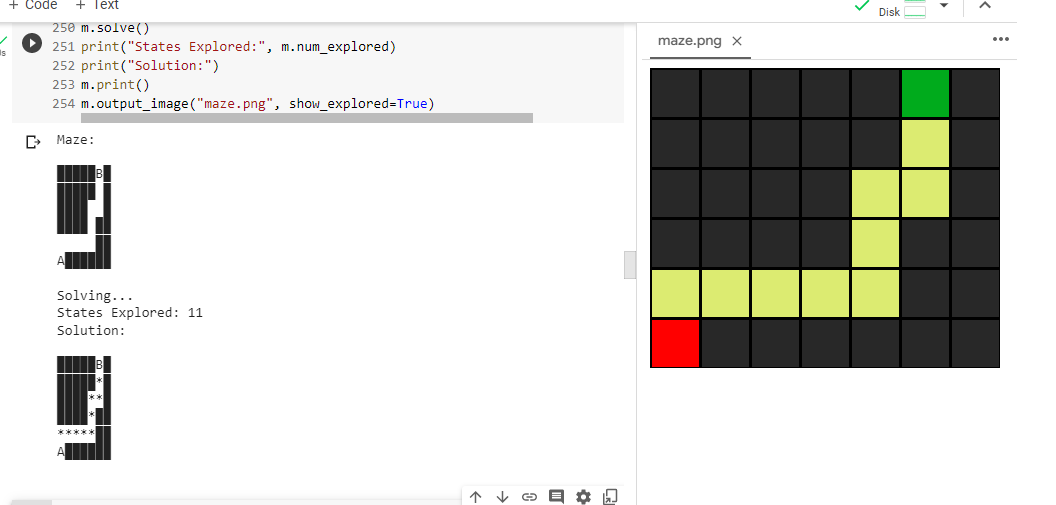

#Task 6 8 Puzzle

#### Note Conatins Code For BFS,DFS,A*,UCS,GBFS

In [ ]:
from queue import PriorityQueue

# Board size and goal state
N = 3
goal = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

# Class to represent board state
class BoardState:
    def __init__(self, board, moves):
        self.board = board
        self.moves = moves
        self.goal_positions = self.get_goal_positions()

    def __eq__(self, other):
        return self.board == other.board

    def __hash__(self):
        return hash(str(self.board))

    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.board])

    def __lt__(self, other):
        return self.f_value() < other.f_value()

    def get_goal_positions(self):
        goal_positions = {}
        for i in range(N):
          for j in range(N):
            goal_positions[goal[i][j]] = (i, j)
        return goal_positions


    def manhattan_distance(self):
      distance = 0
      for i in range(N):
          for j in range(N):
              goal_i,goaL_j = self.goal_positions[self.board[i][j]]
              distance += abs(goal_i-i) + abs(goaL_j-j)
      return distance


    def f_value(self):
        return self.moves + self.manhattan_distance()

# Function to find possible moves
def possible_moves(board):
    moves = []
    row, col = next((i, j) for i, row in enumerate(board) for j, val in enumerate(row) if val == 0)
    if row > 0: moves.append((row-1, col)) # Up
    if row < N-1: moves.append((row+1, col)) # Down
    if col > 0: moves.append((row, col-1)) # Left
    if col < N-1: moves.append((row, col+1)) # Right
    return moves

# Function to perform move and create new board state
def perform_move(board, move):
    moves, cols = len(board), len(board[0])
    row, col = move
    row0, col0 = next((i, row.index(0)) for i, row in enumerate(board) if 0 in row)
    new_board = [row[:] for row in board]
    new_board[row][col], new_board[row0][col0] = new_board[row0][col0], new_board[row][col]
    return BoardState(new_board, moves+1)

# BFS algorithm to find solution
def bfs(initial_state):
    queue = Queue()
    queue.put(initial_state)
    visited = set()
    while not queue.empty():
        current_state = queue.get()
        if current_state.board == goal:
            return current_state
        for move in possible_moves(current_state.board):
            new_state = perform_move(current_state.board, move)
            if new_state not in visited:
                queue.put(new_state)
                visited.add(new_state)
    return None

def dfs(initial_state):
    stack = [(initial_state, set())]
    while stack:
        current_state, visited = stack.pop()
        if current_state.board == goal:
            return current_state
        if current_state in visited:
            continue
        visited.add(current_state)
        for move in possible_moves(current_state.board):
            new_state = perform_move(current_state.board, move)
            stack.append((new_state, visited))
    return None

def astar(initial_state):
    queue = PriorityQueue()
    queue.put((initial_state.f_value(), initial_state))
    visited = set()
    while not queue.empty():
        current_state = queue.get()[1]
        print("Curr_state:\n",current_state)
        if current_state.board == goal:
            return current_state
        for move in possible_moves(current_state.board):
            new_state = perform_move(current_state.board, move)
            if new_state not in visited:
                queue.put((new_state.f_value(), new_state))
                visited.add(new_state)
    return None

def ucs(initial_state):
    queue = PriorityQueue()
    queue.put((initial_state.moves, initial_state))
    visited = set()
    while not queue.empty():
        current_state = queue.get()[1]
        print("Curr_state:\n",current_state)
        if current_state.board == goal:
            return current_state
        for move in possible_moves(current_state.board):
            new_state = perform_move(current_state.board, move)
            if new_state not in visited:
                queue.put((new_state.moves, new_state))
                visited.add(new_state)
    return None

def gbfs(initial_state):
    queue = PriorityQueue()
    queue.put((initial_state.manhattan_distance(), initial_state))
    visited = set()
    while not queue.empty():
        current_state = queue.get()[1]
        print("Curr_state:\n",current_state)
        if current_state.board == goal:
            return current_state
        for move in possible_moves(current_state.board):
            new_state = perform_move(current_state.board, move)
            if new_state not in visited:
                queue.put((new_state.manhattan_distance(), new_state))
                visited.add(new_state)
    return None

# Example usage
initial_board = [[1, 2, 3], [4, 0, 5], [7, 8, 6]]
initial_state = BoardState(initial_board, 0)
solution = astar(initial_state)
if solution is not None:
    print("Solution found in", solution.moves, "moves:")
    print(solution)
else:
    print("No solution found.")


Curr_state:
 1 2 3
4 0 5
7 8 6
Curr_state:
 1 2 3
4 5 0
7 8 6
Curr_state:
 1 2 3
4 5 6
7 8 0
Solution found in 4 moves:
1 2 3
4 5 6
7 8 0
